In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
import sys
!{sys.executable} -m pip install xlrd


You should consider upgrading via the 'c:\venv\ilumpy\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
# importando planilha do excel
ARQUIVO_XPS_EXCEL = "ID_xps.xls"
# informa o nome da planilha 
NOME_DA_PLANILHA = "O1s Scan"
# número da linha que começa os dados (contanto com o nome da coluna de dados)
LINHA_CABECALHO = 15  # considerando que a 1a linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 2] # considerando que a 1a coluna é a número 0

df = pd.read_excel(
    ARQUIVO_XPS_EXCEL,
    sheet_name=NOME_DA_PLANILHA,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df = df.dropna()

In [4]:
# elimina a parte dos dados a direita
logic = df["eV"] <= 538
df = df.loc[logic]

In [5]:
# faz média para começar o eixo y do 0
logic = df["eV"] <= 530
valor_medio_y_entre_524_e_526 = df["Counts / s"].loc[logic].mean()
novo_valor_y = df["Counts / s"].values - valor_medio_y_entre_524_e_526
df["Counts / s"] = novo_valor_y

#df.plot("eV", "Counts / s")
#plt.show()

In [6]:
from lmfit.models import GaussianModel
# fitando gaussianas
modelo = GaussianModel()
dados_x = df["eV"].values
dados_y = df["Counts / s"].values

params = modelo.guess(dados_y, x=dados_x)
resultado_fit = modelo.fit(dados_y, params, x=dados_x)

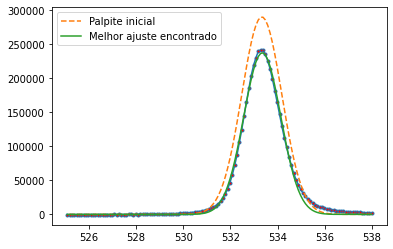

In [7]:
plt.plot(dados_x, dados_y, marker="o", markerfacecolor="red", markersize=3)
plt.plot(dados_x, resultado_fit.init_fit, "--", label="Palpite inicial")
plt.plot(dados_x, resultado_fit.best_fit, "-", label="Melhor ajuste encontrado")
plt.legend()
plt.show()

In [8]:
#print(resultado_fit.fit_report())

(<Figure size 432x432 with 2 Axes>, GridSpec(2, 1, height_ratios=[1, 4]))

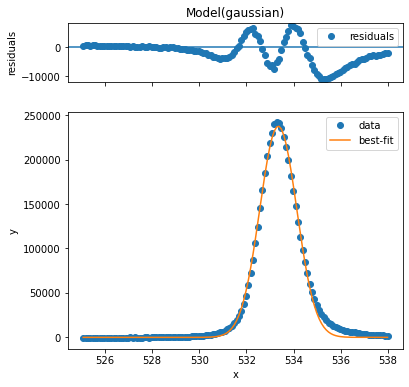

In [9]:
params = modelo.make_params(amplitude= 2500000, center=535, sigma=1)
resultado_fit = modelo.fit(dados_y, params, x=dados_x)
resultado_fit.plot()

### Carbono

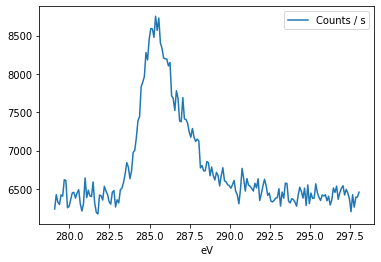

In [10]:
#ARQUIVO_XPS_EXCEL = "ID_xps.xls"
NOME_DA_PLANILHA1 = "C1s Scan"
LINHA_CABECALHO = 15  # considerando que a 1a linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 2] # considerando que a 1a coluna é a número 0

df1 = pd.read_excel(
    ARQUIVO_XPS_EXCEL,
    sheet_name=NOME_DA_PLANILHA1,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

df1 = df1.dropna()
df1.plot("eV", "Counts / s")
plt.show()

In [11]:
logic = df1["eV"] <= 292
df1 = df1.loc[logic]

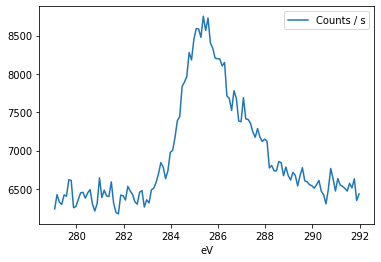

In [12]:
df1.plot("eV", "Counts / s")
plt.show()

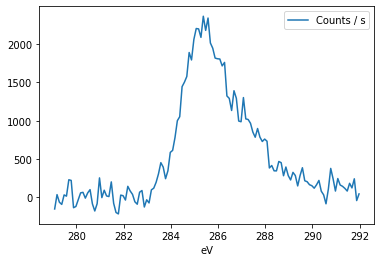

In [13]:
logic = df1["eV"] <= 282

medy = df1["Counts / s"].loc[logic].mean()
novo_valor_y = df1["Counts / s"].values - medy
df1["Counts / s"] = novo_valor_y

df1.plot("eV", "Counts / s")
plt.show()

In [14]:
modelo_gauss1 = GaussianModel(prefix="g1_")
modelo_gauss2 = GaussianModel(prefix="g2_")

modelo_composto = modelo_gauss1 + modelo_gauss2
print(f"Parâmetros do modelo: {modelo_composto.param_names}")

Parâmetros do modelo: ['g1_amplitude', 'g1_center', 'g1_sigma', 'g2_amplitude', 'g2_center', 'g2_sigma']


In [15]:
dados_x1 = df1["eV"].values
dados_y1 = df1["Counts / s"].values

params_gauss1 = modelo_gauss1.make_params()
params_gauss2 = modelo_gauss2.make_params()

params1 =  params_gauss1 + params_gauss2

params1.pretty_print()

Name             Value      Min      Max   Stderr     Vary     Expr Brute_Step
g1_amplitude         1     -inf      inf     None     True     None     None
g1_center            0     -inf      inf     None     True     None     None
g1_fwhm          2.355     -inf      inf     None    False 2.3548200*g1_sigma     None
g1_height       0.3989     -inf      inf     None    False 0.3989423*g1_amplitude/max(1e-15, g1_sigma)     None
g1_sigma             1        0      inf     None     True     None     None
g2_amplitude         1     -inf      inf     None     True     None     None
g2_center            0     -inf      inf     None     True     None     None
g2_fwhm          2.355     -inf      inf     None    False 2.3548200*g2_sigma     None
g2_height       0.3989     -inf      inf     None    False 0.3989423*g2_amplitude/max(1e-15, g2_sigma)     None
g2_sigma             1        0      inf     None     True     None     None


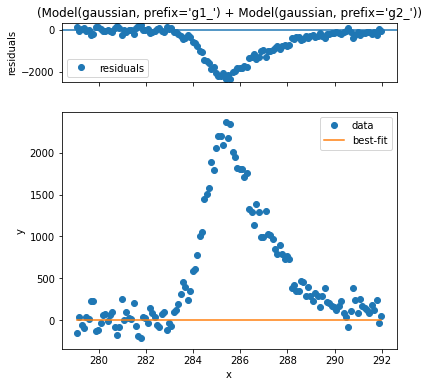

In [16]:
resultado_fit = modelo_composto.fit(dados_y1, params1, x=dados_x1)
resultado_fit.plot()
plt.show()

In [17]:
params1["g1_center"].set(value=284.5, max= 286)
params1["g1_sigma"].set(value=0.01, max= 2)
params1["g1_amplitude"].set(value=2500)

params1["g2_center"].set(value=287.5, min=287)
params1["g2_sigma"].set(value=0.01, max= 2)
params1["g2_amplitude"].set(value=1500)

[[Model]]
    (Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 323
    # data points      = 130
    # variables        = 6
    chi-square         = 1841998.35
    reduced chi-square = 14854.8254
    Akaike info crit   = 1254.64753
    Bayesian info crit = 1271.85274
##  Warning: uncertainties could not be estimated:
    g2_center:     at boundary
[[Variables]]
    g1_amplitude:  3554.26741 (init = 2500)
    g1_center:     285.256004 (init = 284.5)
    g1_sigma:      0.79507543 (init = 0.01)
    g1_fwhm:       1.87225952 == '2.3548200*g1_sigma'
    g1_height:     1783.41270 == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
    g2_amplitude:  3200.58262 (init = 1500)
    g2_center:     287.000001 (init = 287.5)
    g2_sigma:      1.45461716 (init = 0.01)
    g2_fwhm:       3.42536159 == '2.3548200*g2_sigma'
    g2_height:     877.789581 == '0.3989423*g2_amplitude/max(1e-15, g2_sigma)'


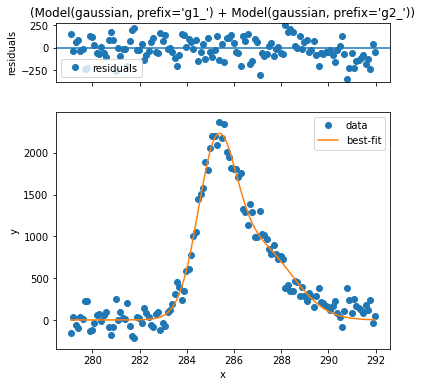

In [18]:
resultado_fit = modelo_composto.fit(dados_y1, params1, x=dados_x1)
print(resultado_fit.fit_report())

resultado_fit.plot()
plt.show()

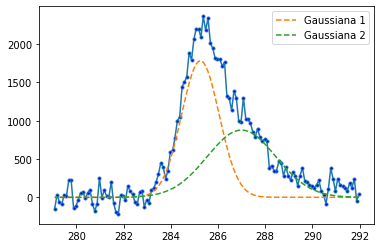

In [19]:
componentes = resultado_fit.eval_components(x=dados_x1)

fig, eixo = plt.subplots()
eixo.plot(dados_x1, dados_y1, marker="o", markerfacecolor="blue", markersize=3)
eixo.plot(dados_x1, componentes["g1_"], "--", label="Gaussiana 1")
eixo.plot(dados_x1, componentes["g2_"], "--", label="Gaussiana 2")
#eixo.plot(dados_x, componentes["exp_"], "--", label="Decaimento exponencial")
eixo.legend()

plt.show()